### Subjective (Bayesian) and Frequentist Interpretation of Probability

For subjective interpretation, \
• Elements of the sample space are hypotheses which are statements that are either true or false (sample space = hypothesis space). \
• P(A) is the degree of belief that hypothesis A is true. \
• Elementary hypotheses are mutually exclusive.

This interpretation is related to Bayes' theorem:

$$P(theory|data)\propto P(data|theory)P(theory)$$

For the disease example in notebook 01: \
• $P(theory) = P(Infected)$. It is the degree of belief that a person is infected before taking the test (prior probability). If other information such as personal health history or exposure risk is available, different prior probabilities could be assigned; therefore, this choice is subjective. \
• $P(data|theory) = P(+|Infected)$. It is the probability of observing a positive test result (which was actually obtained) assuming the person is infected. It is called likelihood because, in this context, we fix the theory (the person being infected) and discuss the probability of the observed data (the positive test result). \
• $P(theory|data) = P(Infected|+)$. It is the posterior probability that the theory (being infected) is correct after seeing the result of the experiment (positive test result).

For frequentist interpretation, \
• Elements of the sample space are possible outcomes of a measurement. \
• A subset A of the sample space is an event. An event is occured, if the outcome of a measurement is in the subset. \
• Probability is the limit of relative frequency, and can never be determined experimentally with perfect precision.

$$P(A) = \lim_{n \to \infty}\frac{\text{number of occurences of A in n measurements}}{\text{n}}$$



### From Histogram to Probability Density Function (PDF)

Assume that the outcome of an experiment is a continuous variable x. We can use a histogram to visualize the distribution of x.

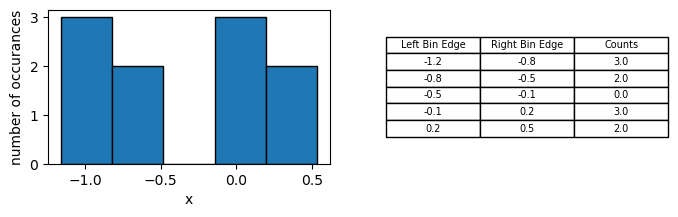

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# generate 10 random numbers (normal distribution, mean=0, std=1)
hist_data = np.random.randn(10)

# plot histogram and table
fig,ax = plt.subplots(1, 2, figsize=(8, 2))
ax[0].hist(hist_data, bins=5, edgecolor='black')
ax[0].set_xlabel('x')
ax[0].set_ylabel('number of occurances')
counts, bin_edges = np.histogram(hist_data, bins=5)
table_data = np.column_stack((bin_edges[:-1], bin_edges[1:], counts))
table_data = np.vectorize(lambda x: f"{x:.1f}")(table_data)
ax[1].table(cellText=table_data, colLabels=['Left Bin Edge','Right Bin Edge','Counts'], loc='center',cellLoc='center',)
ax[1].axis('off')
plt.show()

We used normally distributed random numbers, but the histogram does not exactly look like normal distribution. We can do that by increasing the total number of entries and decreasing the bin width (or increasing the number of bins).

The PDF is a histogram of x normalized to unit area in the limit of zero bin. If we also normalize the histogram (after making $N\to\infty$ and $\Delta x_{i} \to 0$), it will be very close to PDF of normal distribution (with mean=0, std=1).

Another definition of the PDF is that it represents the probability of observing a value x within an infinitesimal interval [x,x+dx], which is given by f(x)dx, where f(x) is the PDF at x and dx is the infinitesimal width of the interval. 

For example, we can calculate the probability of x to be between 0 and 0.5:

$$P(0\leq x \leq 0.5)=\int_{0}^{0.5} f(x)dx$$

We will use trapezoidal rule for integration.

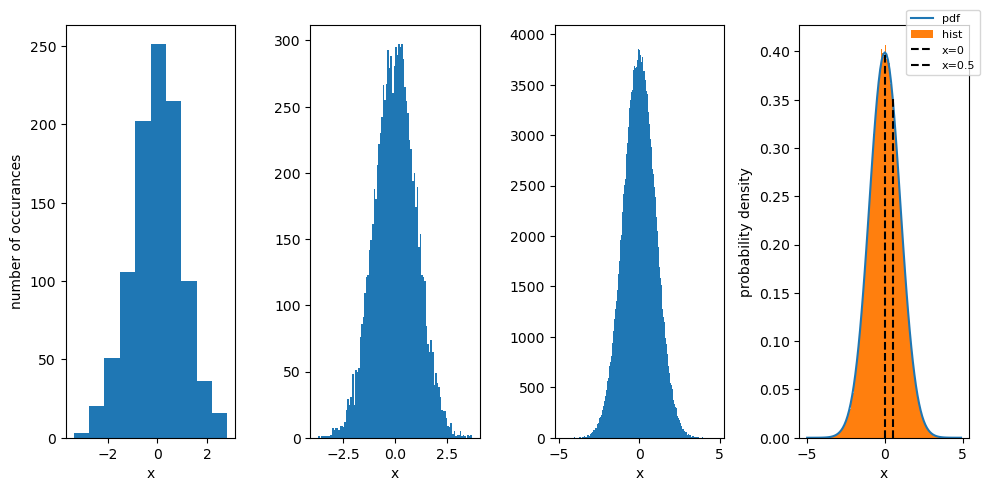

The probability of x to be between 0 and 0.5 is: 0.19111


In [14]:
n_entries = [1000, 10000, 1000000]
n_bins = [10, 100, 1000]
fig,ax = plt.subplots(1, 4, tight_layout=True, figsize=(10, 5))

# first 3 histograms
for i in range(3):
    data = np.random.randn(n_entries[i])
    ax[i].hist(data, bins=n_bins[i])
    ax[i].set_xlabel('x')    
ax[0].set_ylabel('number of occurances')

# function to calculate pdf (theory)
def normal_pdf(x):
    return 1 / (np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# pdf of normal distribution (with mean=0, std=1) and normalized histogram of x
xpdf = np.arange(-5, 5, 0.1)
pdf = normal_pdf(xpdf)
pdf_p1 = normal_pdf(0)
pdf_p2 = normal_pdf(0.5)
ax[3].plot(xpdf, pdf, label='pdf')
ax[3].hist(data, bins=n_bins[2], density=True, label='hist')
ax[3].plot([0, 0], [0, pdf_p1], linestyle='dashed', color='black', label='x=0')
ax[3].plot([0.5, 0.5], [0, pdf_p2], linestyle='dashed', color='black', label='x=0.5')
ax[3].set_xlabel('x')
#plt.xticks(list(plt.xticks()[0]) + [0.5])
ax[3].set_ylabel('probability density')
ax[3].legend(loc="upper right", bbox_to_anchor=(1.1, 1.05), fontsize=8)
plt.show()

# probability of x to be between 0 and 0.5
x = np.arange(0, 0.5, 0.001)
pdf_values = 1 / (np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
probability = np.trapz(pdf_values, x)
print(f"The probability of x to be between 0 and 0.5 is: {probability:.5f}")

### Cumulative Distribution Function (CDF)

The CDF, F(x), of a random variable X gives the probability of X to be less than or equal to x:

$$F(x)=P(X\leq x)=\int_{-\infty}^{x} f(x')dx'$$

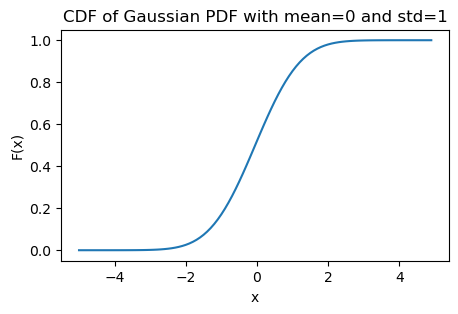

In [91]:
cdf = pdf.cumsum()
cdf /= cdf[-1]
plt.figure(figsize=(5, 3))
plt.plot(xpdf, cdf)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("CDF of Gaussian PDF with mean=0 and std=1")
plt.show()


Using CDF, we can also calculate the probability of X to be in a closed interval like.

$$P(a\leq X\leq b) = F(b)-F(a)$$

Previously, we calculated $P(0\leq X\leq 0.5)$ by integrating the PDF in [0, 0.5] using trapezoidal rule; therefore, we had a result with numerical errors. Now we will use built-in functions of scipy.stats module to calculate it theoretically.

In [49]:
from scipy.stats import norm
p0 = norm.cdf(0, loc=0, scale=1)
p0_5 = norm.cdf(0.5, loc=0, scale=1)
probability = p0_5 - p0
print(f"The probability that X is between 0 and 0.5 is: {probability:.5f}")

The probability that X is between 0 and 0.5 is: 0.19146


### Some Characteristic Values

Quantiles are a useful concept for CDF. The quantile $x_{\alpha}$ is defined as $F(x_{\alpha})=\alpha$.

4 important quantiles: \
• $\alpha=0.95$ $\Longrightarrow$ 95% confidence interval \
• $\alpha=0.75$ $\Longrightarrow$ upper quartile \
• $\alpha=0.50$ $\Longrightarrow$ median \
• $\alpha=0.25$ $\Longrightarrow$ lower quartile

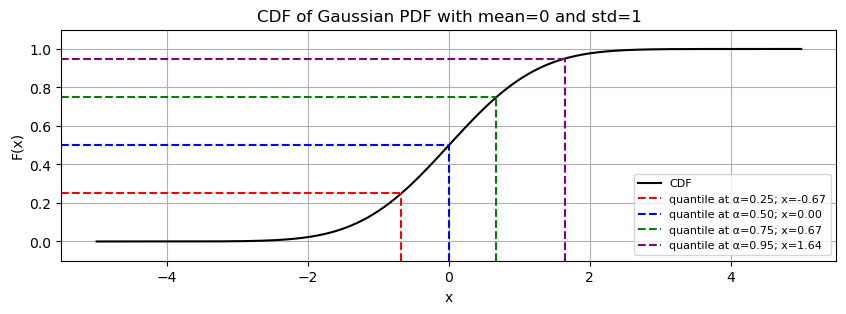

In [89]:
x = np.linspace(-5, 5, 1001)
cdf = norm.cdf(x, 0, 1)

plt.figure(figsize=(10, 3))
plt.plot(x, cdf, color='black', label="CDF")

# percent point function = inverse of CDF
a = [0.25, 0.50, 0.75, 0.95]  # alphas
q = norm.ppf(a, 0, 1)         # quantiles
c = ['red','blue','green','purple']
for i in range(4):
    plt.plot([q[i], q[i]], [-0.1, a[i]], color=c[i], linestyle='--', 
             label=f'quantile at α={a[i]:.2f}; x={q[i]:.2f}')
    plt.plot([-5.5, q[i]], [a[i], a[i]], color=c[i], linestyle='--')

plt.title("CDF of Gaussian PDF with mean=0 and std=1")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.gca().set_xlim([-5.5, 5.5])
plt.gca().set_ylim([-0.1, 1.1])
plt.grid(True)
plt.legend(loc="lower right", fontsize=8)
plt.show()

The mode is the value that appears most frequently in a data set or probability distribution. A distribution can be unimodal (single peak), bimodal (two peaks), or multimodal (multiple peaks).

unimodal modes: [-10.]
bimodal modes: [-10.   0.]
multimodal modes: [-10.   0.  10.]


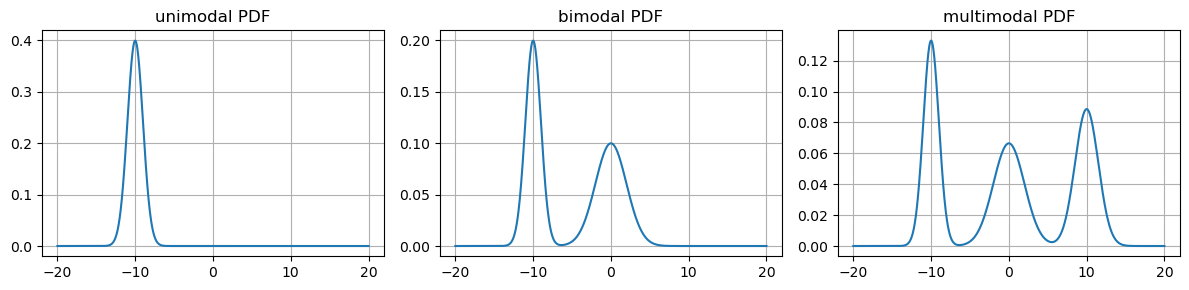

In [136]:
from scipy.signal import find_peaks

x = np.linspace(-20, 20, 1001)
mus = [-10, 0, 10]
sigmas = [1, 2, 1.5]
titles = ['unimodal', 'bimodal', 'multimodal']
plt.figure(tight_layout=True, figsize=(12, 3))

for i in range(3):
    pdf = np.zeros(1001)
    
    # combine the pdfs
    for j in range(i+1):
        p = norm.pdf(x, loc=mus[j], scale=sigmas[j])
        pdf += p
        
    # normalize the combined pdf
    area = np.trapz(pdf, x)
    pdf /= area
    
    # find the modes of the pdf
    peaks, _ = find_peaks(pdf)
    modes = x[peaks]
    print(f"{titles[i]} modes: {modes}")
    
    # plot the pdf
    plt.subplot(1, 3, i+1)
    plt.plot(x, pdf)
    plt.title(f"{titles[i]} PDF")
    plt.grid(True)
    
plt.show()
    

References

[1] Dominic Hirschbühl, Advanced Data Analysis Lecture Notes \
[2] Glen Cowan, Statistical Data Analysis, Oxford University Press